# Inverse Transform Sampling

The probability of drawing any number $x$, to be less than $x_0$, is the value of the CDF at $x$:



$$    \mathcal{P}\left(x < x_0\right) = \mathcal{F}\left(x\right). $$

Since CDFs are monotonically increasing and one-to-one with the independent variable, we can substitute:

$$ \mathcal{P}(F(x)<F(x_0)) = \mathcal{P}(x<x_0).$$

Now we may introduce a random variable $Y$, whose value is equally probably between [0,1], which is described by a DF of:

$$f(y) = \begin{cases} 1 & \text{if } y \in [0,1] \\ 0 & \text{otherwise} \end{cases}$$

We can substitute, stating that the probability of drawing a uniform random value between [0,1] is the same probability of drawing a value $x$ as being less than the value of interest: $x_0$.

$$    \mathcal{P}\left(Y<\mathcal{F}(x_0)\right) = \mathcal{P}(x<x_0). $$

Again, since the CDF and $x$ are monotonically related and one-to-one, we can apply the inverse transform to the left hand side:

$$ \mathcal{P}\left(\mathcal{F}^{-1}(Y)<x_0\right) = \mathcal{P}(x<x_0),$$

which in turn leads to the desired result that:

$$    \mathcal{F}^{-1}\left(Y\right) = x.$$

## Joint probability distribution functions

For simple distribution functions, we can employ inverse transform sampling to discretize a continuous function. This ceases to be a good method when dealing with high dimensional distribution functions that where the variables are not independent. For more intense problems, we have to resort to methods such as the metroplis hasting or markov chain 




### The uniform sphere

We want to uniformly sample points along a sphere--something very useful for a thesis that investigates spherical stellar systems! In general, we have a distribution function that describes the position of a particle on the sphere.  


This DF, like all others, integrates to one over all space:
$$ \int \mathcal{f} d\theta d\phi =1. $$
Additionally, we are searching for a DF that has equally probability of sampling a point at all points in space. A uniform density is not correct, becaue we should have less points at the poles. I like to think of cirlces in latitude. The perimeter of these circles is proportional to the probability 


Given bayes theorem, if the probabilities are independent, we can rewrite our distirbution function as: 
$$  \mathcal{f}(\theta,\phi)= g(\theta)h(\phi)$$

where:
$$  g(\theta) = \int \mathcal{f}(\theta,\phi)d\phi$$
and 
$$  h(\phi) = \int \mathcal{f}(\theta,\phi)d\theta$$

which become
$$  g(\theta) = \frac{\cos\left(\theta\right)}{2}$$
and
$$  h(\phi) = \frac{1}{2\pi}$$

reverse transform sampling $h$ becomes trivial:

where 

$$ CDF(h) = \frac{\phi}{2\pi}, \phi \in [0,2\pi]$$
and 
$$ G(\theta) = CDF(g) = \int g(\theta)d\theta = \frac{1}{2}\left[1+\sin(\theta)\right], \theta \in [-\pi/2,\pi/2]$$

In [3]:
import thesis_rcparams
import matplotlib.pyplot as plt
import numpy as np

In [30]:
def parametric_arc_up_from_xy_plane(vector):
    """
    Returns the angle of the vector from the xy plane in radians.
    """
    x,y,z=vector
    r=np.sqrt(x**2+y**2+z**2)
    R = np.sqrt(x**2 + y**2)
    mytheta = np.arctan2(z, R)
    myphi=np.arctan2(y,x)
    parameter = np.linspace(0, 1, 100)
    arc_x = np.cos(mytheta * parameter) * np.cos(myphi)
    arc_y = np.cos(mytheta * parameter) * np.sin(myphi)
    arc_z = np.sin(mytheta * parameter)
    return arc_x, arc_y, arc_z

def parametric_arc_in_xy_plane(vector):
    """
    Returns the angle of the vector from the xy plane in radians.
    """
    x,y,z=vector
    R=np.sqrt(x**2+y**2)
    phi=np.arctan2(y,x)
    parameter = np.linspace(0, 1, 100)
    arc_x =  R*np.cos(phi*parameter)
    arc_y =  R*np.sin(phi*parameter)
    arc_z = np.zeros_like(parameter)
    return arc_x, arc_y, arc_z

def parametric_cylindrical_circle(vector):
    """
    Given a point, returns a parametric representation of a circle at the same z value.
    """
    x,y,z=vector
    R=np.sqrt(x**2+y**2)
    phi=np.arctan2(y,x)
    parameter = np.linspace(0, 2*np.pi, 100)
    arc_x =  R*np.cos(phi+parameter)
    arc_y =  R*np.sin(phi+parameter)
    arc_z = z*np.ones_like(parameter)
    return arc_x, arc_y, arc_z

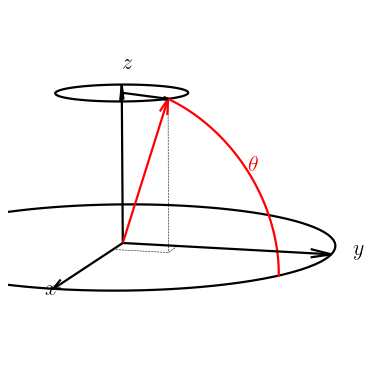

In [45]:
fig=plt.figure(figsize=(8,6),dpi=80)
axis=fig.add_subplot(111,projection='3d')

r0 = 1
theta0 = 2*np.pi/5
phi0 = np.pi/3

x0=r0*np.cos(theta0)*np.cos(phi0)
y0=r0*np.cos(theta0)*np.sin(phi0)
z0=r0*np.sin(theta0)

limit = 1 
### add the axes
axis.set_axis_off()
axis.quiver(0, 0, 0, limit, 0, 0, color='black', linewidth=2, arrow_length_ratio=0.1)
axis.text(limit+limit/10, 0, 0, r'$x$', color='black', fontsize=20)
axis.quiver(0, 0, 0, 0, limit, 0, color='black', linewidth=2, arrow_length_ratio=0.1)
axis.text(0, limit+limit/10, 0, r'$y$', color='black', fontsize=20)
axis.quiver(0, 0, 0, 0, 0, limit, color='black', linewidth=2, arrow_length_ratio=0.1)
axis.text(0, 0, limit+limit/10, r'$z$', color='black', fontsize=20)

# add the example vector
axis.quiver(0, 0, 0, x0, y0, z0, color='red', linewidth=2, arrow_length_ratio=0.1)

# add the xy projection
axis.quiver(0, 0, z0, x0, y0, 0, color='black', linewidth=2, arrow_length_ratio=0.1)
# add the lines to tip in xy plane
axis.plot([x0,x0], [0,y0], [0,0], color='black', linestyle='--',linewidth=0.5)
axis.plot([0,x0], [y0,y0], [0,0], color='black', linestyle='--',linewidth=0.5)
# add line from tip to xy plane
axis.plot([x0,x0], [y0,y0], [z0,0], color='black', linestyle='--',linewidth=0.5)

# make a cirlce in the xy plane
arc_x, arc_y, arc_z=parametric_cylindrical_circle([x0,y0,z0])
axis.plot(arc_x/factor, arc_y/factor, arc_z/factor, color='black', linewidth=2)
# make a cirlce in the xy plane
arc_x, arc_y, arc_z=parametric_cylindrical_circle([r0,0,0])
axis.plot(arc_x, arc_y, arc_z, color='black', linewidth=2)

arc_x, arc_y, arc_z=parametric_arc_up_from_xy_plane([x0,y0,z0])
axis.plot(arc_x, arc_y, arc_z, color='red', linewidth=2)
theta_pos = np.arctan2(z0, np.sqrt(x0**2+y0**2))/2
xpos = r0*np.cos(theta_pos)*np.cos(phi0)
ypos = r0*np.cos(theta_pos)*np.sin(phi0)
zpos = r0*np.sin(theta_pos)

axis.text(xpos, ypos, zpos, r'$\theta$', color='red', fontsize=20)    

axis.set_xlim([0, 1])
axis.set_ylim([0, 1])
axis.set_zlim([0, 1])

axis.view_init(elev=10, azim=15)


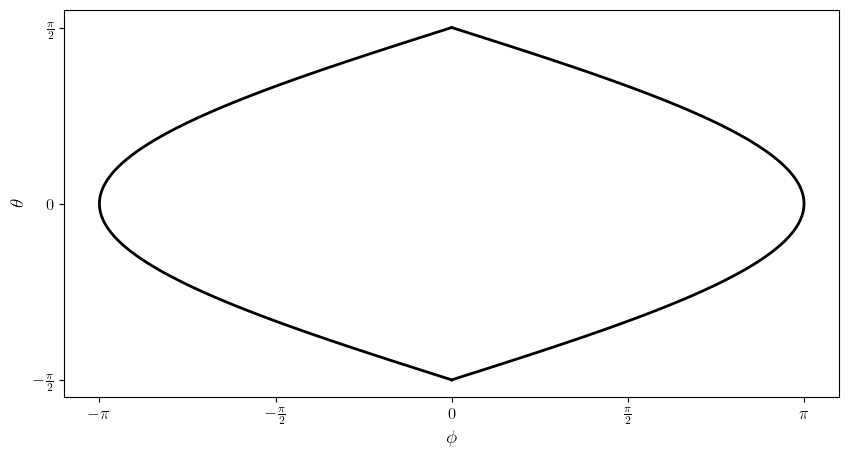

In [63]:
fig,axis=plt.subplots()
theta=np.linspace(-np.pi/2, np.pi/2, 100)
R = np.cos(theta)
axis.plot(np.pi*R,theta, color="k")
axis.plot(-np.pi*R,theta,color="k")
axis.set_aspect('equal')
axis.set_xlabel(r"$\phi$")
axis.set_ylabel(r"$\theta$")
labels = [r"$-\pi$", r"$-\frac{\pi}{2}$", r"$0$", r"$\frac{\pi}{2}$", r"$\pi$"]
ticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
axis.set_xticks(ticks)
axis.set_xticklabels(labels)
axis.set_yticks([-np.pi/2, 0, np.pi/2])
axis.set_yticklabels([r"$-\frac{\pi}{2}$", r"$0$", r"$\frac{\pi}{2}$"]);
